### Dummy Variables

You saw in the earlier notebook that you weren't able to directly add a categorical variable to your multiple linear regression model.  In this notebook, you will get some practice adding dummy variables to your models and interpreting the output.

Let's start by reading in the necessary libraries and data.

In [19]:
import numpy as np
import pandas as pd
import statsmodels.api as sm;
import matplotlib.pyplot as plt
%matplotlib inline

df = pd.read_csv('02-Dataset/house_prices.csv')
df.head()

,house_id,neighborhood,area,bedrooms,bathrooms,style,price
0,1112,B,1188,3,2,ranch,598291
1,491,B,3512,5,3,victorian,1744259
2,5952,B,1134,3,2,ranch,571669
3,3525,A,1940,4,2,ranch,493675
4,5108,B,2208,6,4,victorian,1101539


In [20]:
df['style'].value_counts()

victorian    2997
ranch        1802
lodge        1229
Name: style, dtype: int64

`1.` Use the [pd.get_dummies](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html) documentation to assist you with obtaining dummy variables for the **neighborhood** column.  Then use [join](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) to add the dummy variables to your dataframe, **df**, and store the joined results in **df_new**.

Fit a linear model using **all three levels** of **neighborhood** neighborhood to predict the price. Don't forget an intercept.

Use your results to answer quiz 1 below.

In [21]:
# Copying
df_new = df.copy()

# Creating the dummies variables for neighborhood.
neighborhood = pd.get_dummies(df['neighborhood'])

# Creating the dummies variables for style.
style = pd.get_dummies(df['style'])

In [22]:
df_new[['A', 'B', 'C']] = neighborhood

df_new[['lodge','ranch','victorian']] = style

In [23]:
# Adding the intercept.
df_new['intercept'] = 1

# Creating the object
lm = sm.OLS(df['price'],df_new[['intercept','A','B','C']])

# Calculating the multiple linear model
results = lm.fit()

# Printing the results using the summary.
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.245
Method:                 Least Squares   F-statistic:                     654.5
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:26:20   Log-Likelihood:                -87083.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6024   BIC:                         1.742e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.975e+17    1.5e+17      1.313      0.189   -9.73e+16    4.92e+17
A          -1.975e+17    1.5e+17     -1.313      0.189   -4.92e+17    9.73e+16
B          -1.975e+17    1.5e+17     -1.313      0.189   -4.92e+17    9.73e+16
C          -1.975e+17    1.5e+17     -1.313      0.189   -4.92e+17    9.73e+16
==============================================================================
Omnibus:                      692.748   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1161.386
Skew:                           0.796   Prob(JB):                    6.43e-253
Kurtosis:                       4.446   Cond. No.                     5.95e+13
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 2.29e-24. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

`2.`  Now, fit an appropriate linear model for using **neighborhood** to predict the price of a home. Use **neighborhood A** as your baseline.  Use your resulting model to answer the questions in Quiz 2 and Quiz 3 below.

In [24]:
# Creating the object
lm_q2 = sm.OLS(df_new['price'],df_new[['intercept','B','C']])

# Calculating the multiple linear model
results_q2 = lm_q2.fit()

# Printing the results using the summary.
results_q2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.246
Model:                            OLS   Adj. R-squared:                  0.246
Method:                 Least Squares   F-statistic:                     983.1
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:26:21   Log-Likelihood:                -87082.
No. Observations:                6028   AIC:                         1.742e+05
Df Residuals:                    6025   BIC:                         1.742e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   5.411e+05   1.05e+04     51.537      0.000    5.21e+05    5.62e+05
B           5.295e+05    1.4e+04     37.870      0.000    5.02e+05    5.57e+05
C           -332.3594   1.52e+04     -0.022      0.983   -3.01e+04    2.94e+04
==============================================================================
Omnibus:                      689.315   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1154.155
Skew:                           0.793   Prob(JB):                    2.39e-251
Kurtosis:                       4.442   Cond. No.                         3.88
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
print("Coef A: ", 5.411e+05)
print("Coef B: ", 5.411e+05 + 5.295e+05)
print("Coef C: ", 5.411e+05 - 332.3594)

Coef A:  541100.0
Coef B:  1070600.0
Coef C:  540767.6406


Coef C < Coef A < Coef B

`3.` Run the two cells below to look at the home prices for the **A** and **C** neighborhoods.  Add neighborhood **B**.  This creates a glimpse into the differences that you found in the previous linear model.

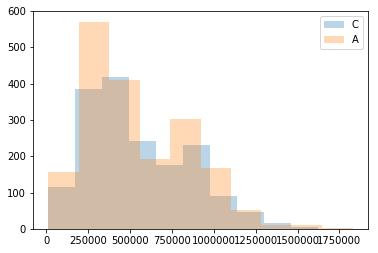

In [26]:
plt.hist(df_new.query("C == 1")['price'], alpha = 0.3, label = 'C');
plt.hist(df_new.query("A == 1")['price'], alpha = 0.3, label = 'A');

plt.legend();

`4.` Now, add dummy variables for the **style** of house, as well as **neighborhood**.  Use **ranch** as the baseline for the **style**.  Additionally, add **bathrooms** and **bedrooms** to your linear model.  Don't forget an intercept.  Use the results of your linear model to answer the last two questions below. **Home pricess are measured in dollars, and this dataset is not real.**

To minimize scrolling, it might be useful to open another browser window to this concept to answer the quiz questions.

In [27]:
# Creating the object
lm_q4 = sm.OLS(df_new['price'],df_new[['intercept', 'B', 'C', 'lodge', 'victorian', 'bedrooms', 'bathrooms']])

# Calculating the multiple linear model
results_q4 = lm_q4.fit()

# Printing the results using the summary.
results_q4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Thu, 10 Jan 2019   Prob (F-statistic):               0.00
Time:                        23:28:32   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -3.833e+05    1.2e+04    -31.995      0.000   -4.07e+05    -3.6e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
lodge       1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
victorian   7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficients - Using A as baseline

In [43]:
# Using A as baseline.
print("Coef A: ",-3.833e+05)
print("Coef B: ", -3.833e+05 + 5.229e+05)
print("Coef C: ", -3.833e+05 -7168.6285)

Coef A:  -383300.0
Coef B:  139600.0
Coef C:  -390468.6285


In [47]:
# Using ranch as baseline.
print("Ranch: ",-3.833e+05)
print("lodge: ", -3.833e+05 + 1.685e+05)
print("victorian: ", -3.833e+05 + 7.056e+04)

Ranch:  -383300.0
lodge:  -214800.0
victorian:  -312740.0


In [39]:
 # Creating the object
lm_q5 = sm.OLS(df_new['price'],df_new[['intercept', 'A', 'C', 'lodge', 'victorian', 'bedrooms', 'bathrooms']])

# Calculating the multiple linear model
results_q5 = lm_q5.fit()

# Printing the results using the summary.
results_q5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:11:59   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept   1.396e+05   1.17e+04     11.961      0.000    1.17e+05    1.63e+05
A          -5.229e+05   7040.928    -74.271      0.000   -5.37e+05   -5.09e+05
C          -5.301e+05   7211.702    -73.506      0.000   -5.44e+05   -5.16e+05
lodge       1.685e+05   9906.629     17.012      0.000    1.49e+05    1.88e+05
victorian   7.056e+04   8337.790      8.463      0.000    5.42e+04    8.69e+04
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### Coefficients - Using B as baseline

In [46]:
# Using B as baseline.
print("Coef A: ", 1.396e+05 -5.229e+05)
print("Coef B: ", 1.396e+05)
print("Coef C: ", 1.396e+05-5.301e+05)

Coef A:  -383300.0
Coef B:  139600.0
Coef C:  -390500.0


As expected, the coefficients are the same.

In [50]:
 # Creating the object
lm_q6 = sm.OLS(df_new['price'],df_new[['intercept', 'B', 'C', 'ranch', 'victorian', 'bedrooms', 'bathrooms']])

# Calculating the multiple linear model
results_q6 = lm_q6.fit()

# Printing the results using the summary.
results_q6.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.809
Model:                            OLS   Adj. R-squared:                  0.809
Method:                 Least Squares   F-statistic:                     4250.
Date:                Fri, 11 Jan 2019   Prob (F-statistic):               0.00
Time:                        01:24:22   Log-Likelihood:                -82944.
No. Observations:                6028   AIC:                         1.659e+05
Df Residuals:                    6021   BIC:                         1.659e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept  -2.148e+05   9563.445    -22.456      0.000   -2.34e+05   -1.96e+05
B           5.229e+05   7040.928     74.271      0.000    5.09e+05    5.37e+05
C          -7168.6285   7639.254     -0.938      0.348   -2.21e+04    7807.045
ranch      -1.685e+05   9906.629    -17.012      0.000   -1.88e+05   -1.49e+05
victorian  -9.797e+04   1.26e+04     -7.780      0.000   -1.23e+05   -7.33e+04
bedrooms    1.732e+05   7677.152     22.558      0.000    1.58e+05    1.88e+05
bathrooms   9.996e+04   1.09e+04      9.164      0.000    7.86e+04    1.21e+05
==============================================================================
Omnibus:                      978.611   Durbin-Watson:                   1.993
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2926.472
Skew:                           0.848   Prob(JB):                         0.00
Kurtosis:                       5.962   Cond. No.                         25.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
# Using lodge as baseline.
print("Ranch: ",-2.148e+05 - 1.685e+05 )
print("lodge: ", -2.148e+05)
print("victorian: ", -2.148e+05 - 9.797e+04)

Ranch:  -383300.0
lodge:  -214800.0
victorian:  -312770.0
